In [1]:
def eval_func(f, x):
    return f(x)

def func(x):
    return 1/x**0.5

re = eval_func(func, 1)

print(re)

1.0


# Exercise 1 - Page 31
# =========

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Death_rates_and_life_expectancy_at_birth.csv')
# df.head
print('Done Reading the Data')

Done Reading the Data


In [11]:
df.where(df['Age-adjusted Death Rate'] < 1000).dropna().iloc[0]['Year']

2014.0

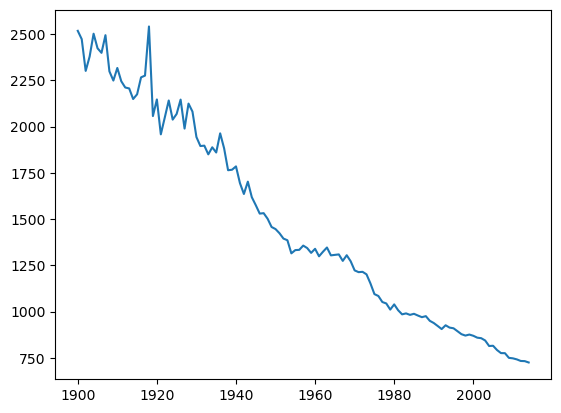

In [33]:
allRace = df.where(df['Race'] == 'All Races').dropna()
cleanData = allRace.where(allRace['Sex'] == 'Both Sexes').dropna()

plt.plot(cleanData['Year'], cleanData['Age-adjusted Death Rate'])
plt.show()

# Exercise 2 - Page 36
# =========

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_air = pd.read_csv('Air_Quality.csv')
df_pop = pd.read_csv('New_York_City_Population_By_Census_Tracts.csv')

print('Done Reading Data')

#######
df_air = df_air.set_index('geo_entity_name')

df_pop = df_pop.set_index(['Borough', 'Census Tract'])

df_pop = df_pop.drop(['Year', 'FIPS County Code', 'DCP Borough Code'], axis=1)

print('Done Indexing')

Done Reading Data
Done Indexing


In [51]:
areas = df_pop.index.levels[0]

#Loop over the areas and calculate the sum
populations = [sum(df_pop['Population'][i]) for i in areas]

#Create new Data Frame
pop_data = {'Borough': areas,
            'population': populations}

df_pop_new = pd.DataFrame(pop_data)
df_pop_new = df_pop_new.set_index('Borough')

print('Population Data is Ready')

Population Data is Ready


In [79]:
#Select Year
pollution_year = df_air[df_air['year_description'] == 'Annual Average 2009-2010']

#Select name
df_air_new = pollution_year[pollution_year['name'] == 'Neighborhood Air Quality Concentrations- Elemental Carbon (EC)']

#Drop column
df_air_new = df_air_new.drop(['indicator_data_id', 'name', 'year_description', 'indicator_id', 'Measure', 'geo_type_name', 'geo_entity_id', 'geo_type_name'], axis=1)

print('Pollution Data is Ready')

Pollution Data is Ready


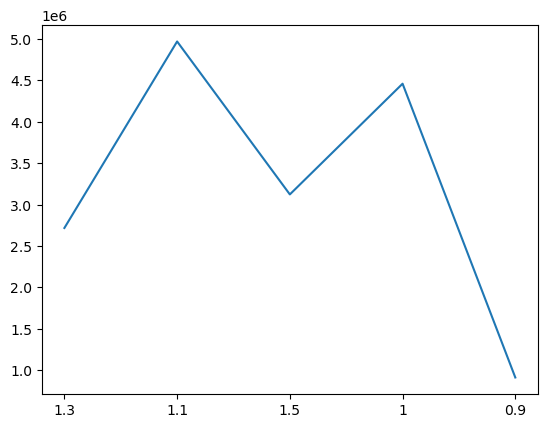

In [92]:
outer = pd.merge(df_air_new, df_pop_new, how='outer', left_index=True, right_index=True)
inner = pd.merge(df_air_new, df_pop_new, how='inner', left_index=True, right_index=True)
left  = pd.merge(df_air_new, df_pop_new, how='left',  left_index=True, right_index=True)
right = pd.merge(df_air_new, df_pop_new, how='right', left_index=True, right_index=True)

plt.plot(inner['data_valuemessage'], inner['population'])
plt.show()

# Exercise 3 - Page 43
# =========

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('San_Francisco_Speed_Limit_Compliance.csv')
print('Done Reading Data')

Done Reading Data


In [51]:
# Cleaning the data

# Replace all Speed Limit of 0 with 10
df.loc[df['SpeedLimit'] == 0, 'SpeedLimit'] = 10

In [64]:
# Group By STREETNAME and show Streets with speed average over 85
df_over_speed_avg = df.groupby('STREETNAME')['Over_pct'].agg(np.average)
df_over_speed_avg.where(df_over_speed_avg > 85).dropna()

STREETNAME
7TH AVE                      86.693333
ANZA ST                      92.500000
BOSWORTH ST                 100.000000
CLEMENT ST                   88.000000
CUVIER ST                   100.000000
DEWEY BLVD                   85.030000
DOLORES ST                   87.186667
KIRKHAM ST                   85.655000
MARTIN LUTHER KING JR DR     91.000000
SAN JOSE AVE                 86.748571
STANYAN BLVD                 85.380000
STOCKTON ST                  98.000000
STOCKTON TUNL                98.000000
Name: Over_pct, dtype: float64

In [76]:
# Aggregate function
def speed_grouping(speed):
    if(int(speed) > 85):
        return 'Red Street'
    if(85 > int(speed) > 50):
        return 'Orange Street'
    if(50 > int(speed) > 20):
        return 'Yellow Street'
    else:
        return 'Green Street'

In [75]:
# Read File
df_new_grouping = pd.read_csv('San_Francisco_Speed_Limit_Compliance.csv').set_index('O5mph_pct')

# Use Aggregate function on index
for group, frame in df_new_grouping.groupby(speed_grouping):
    print('Group {}: {}'.format(group, len(frame)))


Group Green Street: 417
Group Orange Street: 22
Group Red Street: 12
Group Yellow Street: 162


In [80]:
# agg fnuction - for every column pass the agg method as an array
df_new_grouping.groupby(speed_grouping).agg({'Speed_avg': [np.median, max, min], 'Spd5O_avg': [np.median, max, min]})

Speed_avg               Spd5O_avg              
                 median    max    min    median    max    min
O5mph_pct                                                    
Green Street     25.650  36.38  12.68    37.000  55.00   0.00
Orange Street    30.750  33.30  30.08    34.050  35.37  33.45
Red Street       38.305  47.14  35.56    38.975  47.14  36.90
Yellow Street    28.660  41.13  24.83    33.670  47.63  32.22

In [86]:
# Read File
df_pivot = pd.read_csv('San_Francisco_Speed_Limit_Compliance.csv')

# Clean data
# Replace all Speed Limit of 0 with 10
df_pivot.loc[df_pivot['SpeedLimit'] == 0, 'SpeedLimit'] = 10

df_pivot.pivot_table(values = 'Over_pct', index = 'STREETNAME', columns = 'SpeedLimit', aggfunc = [np.nanmean])

nanmean                
SpeedLimit           10  25    30    35
STREETNAME                             
10TH AVE          34.36 NaN   NaN   NaN
10TH ST             NaN NaN  39.0   NaN
15TH ST           66.50 NaN   NaN   NaN
16TH ST           83.00 NaN  42.0   NaN
17TH AVE          69.01 NaN   NaN   NaN
...                 ...  ..   ...   ...
WAWONA ST         32.54 NaN   NaN   NaN
WHITNEY ST        30.04 NaN   NaN   NaN
WOOD ST           21.74 NaN   NaN   NaN
WOODSIDE AVE        NaN NaN   NaN  29.0
YERBA BUENA AVE   13.84 NaN   NaN   NaN

[182 rows x 4 columns]

# Classified Data Sets - Page 44
# ========================